# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [ ]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **record**.
1. There are **208166** rows in the dataset
    1. There are **9** columns in the dataset excluding the index.
1. The first review is written on **2007/1/2**.
    1. The last review is written on **2019/12/13**.

In [ ]:
# import any necessary libraries here
import pandas as pd
import os
from datetime import datetime

In [ ]:
# First, list the folder containing your data
# fpath = 'path/to/your/data'
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets
fpath = "drive/MyDrive/data"
print(os.listdir(fpath))

['quebec_biz.csv', 'quebec_yelp_reviews.csv', 'quebec_yelp_reviews_filtered.csv']


In [ ]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
# df = pd.read_csv(fpath + 'review_dataset_filename.csv', index_col = 0)
# you can call the dataframe something other than df

reviews = pd.read_csv(fpath + "/quebec_yelp_reviews.csv", index_col=0)

In [ ]:
# preview the dataframe's first 5 rows using the .head() method
# what unit of observation does each row represent?
reviews.head()
# it displays all columns and 5 rows

,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [ ]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
reviews.shape

(208166, 9)

In [ ]:
# take a look at the column names by accessing the dataframe's column attribute, 
# e.g. df.columns.values (but replace df with the name you picked)
reviews.columns.values

array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [ ]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
reviews["date"] = pd.to_datetime(reviews['date'])

In [ ]:
# find the smallest date (use the .min method)
reviews["date"].min().date()

datetime.date(2007, 1, 2)

In [ ]:
# find the largest date (use the .max method)
reviews["date"].max().date()

datetime.date(2019, 12, 13)

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [ ]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'
from_date = datetime.strptime('2016/5/1', "%Y/%m/%d")
to_date = datetime.strptime('2019/6/1',  "%Y/%m/%d")

new_review = reviews[reviews["date"] >= from_date]
new_review = new_review[new_review["date"] < to_date]

In [ ]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date
new_review["date"].min().date()

datetime.date(2016, 5, 1)

In [ ]:
# max date
new_review["date"].max().date()

datetime.date(2019, 5, 31)

In [ ]:
# save the dataset somewhere, give it a meaningful file name
new_review.to_csv(fpath + "/quebec_yelp_reviews_filtered.csv")

# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)
1. (Describe the pattern)
1. (Speculate why this pattern might exist)

In [ ]:
# create 'ym' column
reviews["ym"] = reviews["date"].dt.to_period("M")


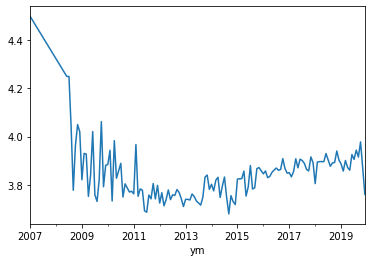

In [ ]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples
reviews.groupby(["ym"])["stars"].mean().plot()

In [ ]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method
reviews["ym"].unique()


<PeriodArray>
['2013-12', '2016-07', '2012-06', '2016-02', '2015-05', '2015-09', '2015-10',
 '2016-09', '2014-07', '2018-09',
 ...
 '2010-12', '2009-02', '2009-12', '2010-11', '2010-05', '2010-04', '2010-02',
 '2008-07', '2007-01', '2008-06']
Length: 140, dtype: period[M]


1. The reviews are in between 3.5 to 4.5. The years from 2007 to 2011 has got more higher reviews than later years.
2. The pattern can be observed because of good business in those years. 
3. People tends to give more reviews because of good experience in those years.

# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?

 Ans. The observational unit of the dataset is head of the data, which will give us some information on the rows and column values.
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

 Ans: We should merge on business_id
**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **record**
1. We should merge on **business_id**

### Part B

1. (Describe any difference in patterns between currently open and shut down businesses)
 
 Ans: The open business has is_open field = `1` and closed businesses has is_open = `1`. The open businesses are always larger than the closed businesses. But there is a very little gap between open and closed businesses. 
1. 2 possible reasons are:
    1. (Clearly explain one hypothesized reason)
    1. (Clearly explain a second hypothesized reason)

Ans. 
1. The reson for this closed business is maybe because of less profits.
     
2. The another reason can be a less biz_stars. As closed businesses has only only upto 4.0 stars and around 70% business has stars of 3.5 or less. 

In [ ]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)
biz = pd.read_csv(fpath + "/quebec_biz.csv")
biz.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
# Take a look at the first few rows to determine the observational unit
biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
0,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
1,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
3,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
4,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# merge the 2 datasets
df = biz.merge(reviews, how="left", on="business_id")

In [ ]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'biz_stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'useful',
       'funny', 'cool', 'text', 'date', 'stars', 'ym'],
      dtype='object')

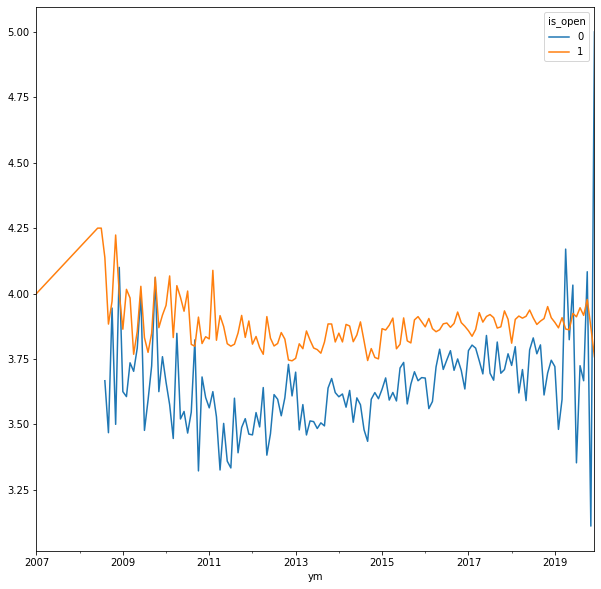

In [ ]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes
df.groupby(["ym", "is_open"])["stars"].mean().unstack("is_open").plot(figsize=(10, 10))

In [ ]:
# counting stars for closed businesses. 
biz[biz["is_open"] == 0]["biz_stars"].value_counts()  

4.0    535
3.5    440
3.0    315
4.5    301
2.5    182
2.0     98
5.0     77
1.5     45
1.0     25
Name: biz_stars, dtype: int64